In [224]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (15, 5)
df = pd.read_csv('sample.csv',header=0,parse_dates=True, index_col='date',\
                   names=['date','ip','cpuidle','memtotal','memused','rx','tx','rootrate','ioawait','ioutil'])
df.dropna(axis=0)
df[:3]

,ip,cpuidle,memtotal,memused,rx,tx,rootrate,ioawait,ioutil
date,,,,,,,,,
2020-02-23 22:20:02,192.168.10.171,88.2,2047936,594160,19232,61151,14,0.31,0.35
2020-02-23 22:25:02,192.168.10.171,88.2,2047936,602008,7023,13761,14,0.31,0.35
2020-02-23 22:30:02,192.168.10.171,87.5,2047936,603252,11638,17528,14,0.31,0.35


In [225]:
#  列里面不包括索引列date
df.columns

Index(['ip', 'cpuidle', 'memtotal', 'memused', 'rx', 'tx', 'rootrate',
       'ioawait', 'ioutil'],
      dtype='object')

In [226]:
df.dtypes

ip           object
cpuidle     float64
memtotal      int64
memused       int64
rx            int64
tx            int64
rootrate      int64
ioawait     float64
ioutil      float64
dtype: object

In [227]:
df.index

DatetimeIndex(['2020-02-23 22:20:02', '2020-02-23 22:25:02',
               '2020-02-23 22:30:02', '2020-02-23 22:35:02',
               '2020-02-23 22:40:02', '2020-02-23 22:45:02',
               '2020-02-23 22:50:02', '2020-02-23 22:55:02',
               '2020-02-23 23:00:02', '2020-02-23 23:05:02',
               ...
               '2020-03-04 21:40:06', '2020-03-04 21:45:06',
               '2020-03-04 21:50:06', '2020-03-04 21:55:06',
               '2020-03-04 22:00:06', '2020-03-04 22:05:06',
               '2020-03-04 22:10:07', '2020-03-04 22:15:06',
               '2020-03-04 22:20:07', '2020-03-04 22:25:06'],
              dtype='datetime64[ns]', name='date', length=31679, freq=None)

In [228]:
df.info

<bound method DataFrame.info of                                  ip  cpuidle  memtotal  memused     rx     tx  \
date                                                                            
2020-02-23 22:20:02  192.168.10.171     88.2   2047936   594160  19232  61151   
2020-02-23 22:25:02  192.168.10.171     88.2   2047936   602008   7023  13761   
2020-02-23 22:30:02  192.168.10.171     87.5   2047936   603252  11638  17528   
2020-02-23 22:35:02  192.168.10.171     93.8   2047936   595900  12014  18819   
2020-02-23 22:40:02  192.168.10.171     88.2   2047936   597732  11964  21469   
...                             ...      ...       ...      ...    ...    ...   
2020-03-04 22:05:06   192.168.10.97     54.5   4040092  1193092  32531   1157   
2020-03-04 22:10:07   192.168.10.97     73.5   4040092  1215996  69641   3245   
2020-03-04 22:15:06   192.168.10.97     35.3   4040092  1201992   4682    635   
2020-03-04 22:20:07   192.168.10.97     72.7   4040092  1219812  58807   2810

In [252]:
## 加一列内存使用率memutils，存到df3
memutils_df=pd.DataFrame(df['memused']/df['memtotal']*100).round(2)
memutils_df.columns=['memutils']
memutils_df[:5]
df3=pd.merge(df,memutils_df,how='right',left_index=True,right_index=True)

In [253]:
df3[:3]

,ip,cpuidle,memtotal,memused,rx,tx,rootrate,ioawait,ioutil,memutils
date,,,,,,,,,,
2020-02-23 22:10:02,192.168.10.23,41.3,115572872,90595360,1005,253,67,1.66,0.07,78.39
2020-02-23 22:10:03,192.168.10.92,46.0,8168864,3846048,95167,129432,71,3.51,56.01,47.08
2020-02-23 22:15:02,192.168.10.30,93.8,65955588,65264088,12110,117974,67,3.05,0.22,98.95


In [254]:
## 单独画一个ip的cpuidle图，用resample改时间间隔重取数据
df.loc[(df['ip']=='192.168.10.171'),['cpuidle']][:5]

,cpuidle
date,
2020-02-23 22:20:02,88.2
2020-02-23 22:25:02,88.2
2020-02-23 22:30:02,87.5
2020-02-23 22:35:02,93.8
2020-02-23 22:40:02,88.2


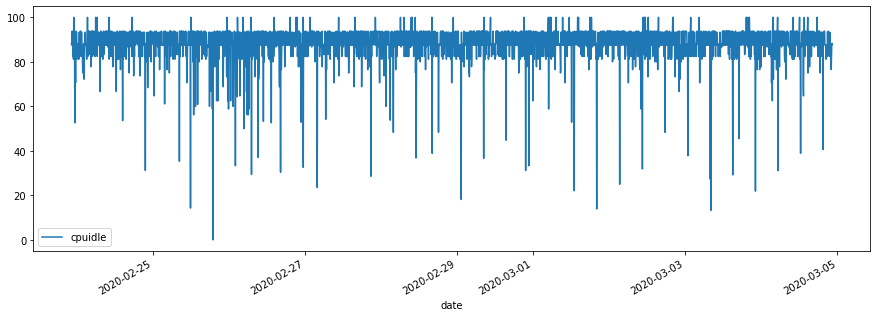

In [255]:
#单个ip的cpuidle曲线图，数据太密了，没法看
df.loc[(df['ip']=='192.168.10.171'),['cpuidle']].plot()

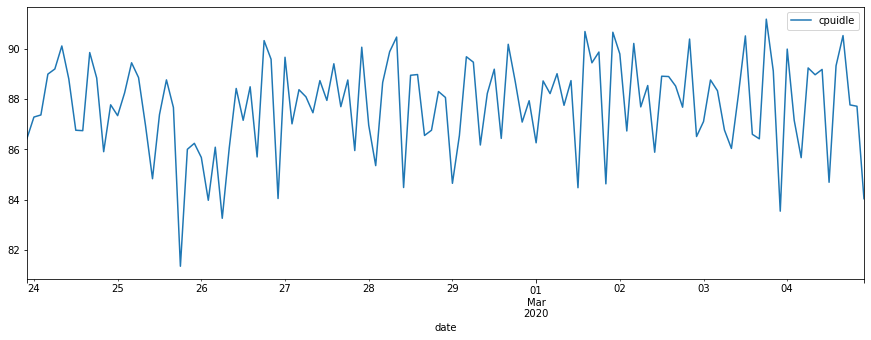

In [256]:
#用resample重新采样
df.loc[(df['ip']=='192.168.10.171' ),['cpuidle']].resample('120min').mean().plot()

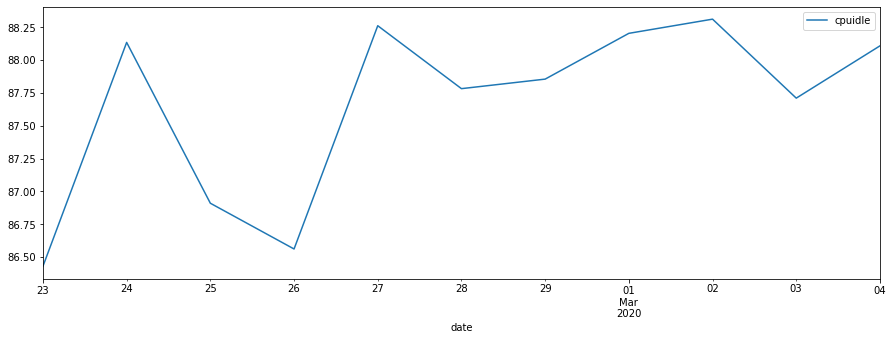

In [257]:
#按天采样再画
df.loc[(df['ip']=='192.168.10.171' ),['cpuidle']].resample('D').mean().plot.line()

ip
192.168.10.171    AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.23     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.28     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.30     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.40     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.92     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.93     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.94     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.95     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.96     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.97     AxesSubplot(0.125,0.125;0.775x0.755)
Name: cpuidle, dtype: object

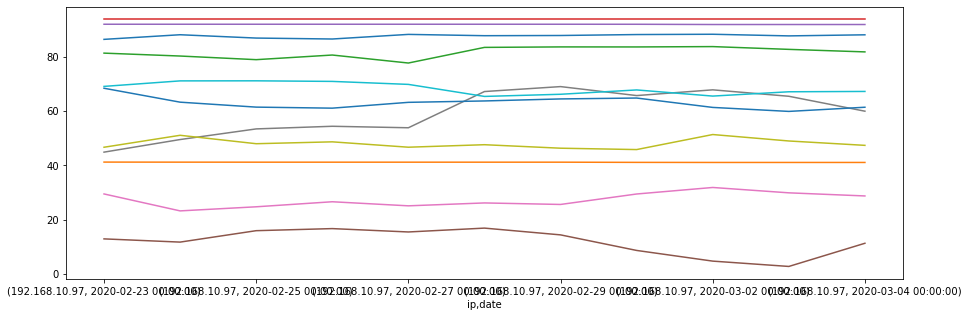

In [258]:
## 按ip分组，显示cpuidle变化曲线，只是没法标出label，不大好：（
df.groupby('ip')['cpuidle'].resample('D').mean().groupby('ip').plot()

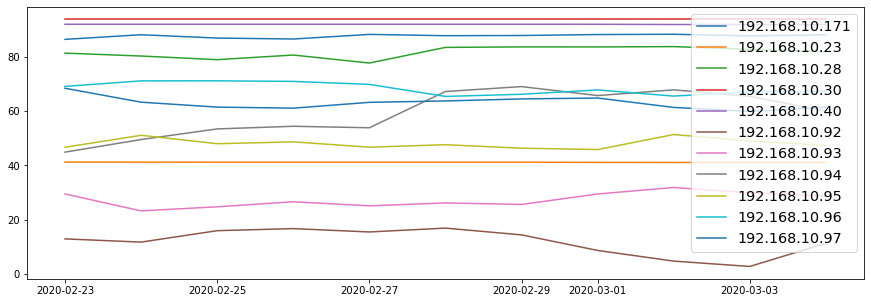

In [259]:
##  加上label，语法麻烦点
dfg=df.groupby('ip')['cpuidle'].resample('D').mean().reset_index().set_index('date')
ips=dfg['ip'].unique()
fig, ax = plt.subplots()
for ip in ips:
    dftmp=dfg[(dfg['ip']==ip)]['cpuidle'].reset_index()
    ax.plot(dftmp['date'],dftmp['cpuidle'],label=ip)
    legend = ax.legend(loc='upper right',  fontsize='x-large')

plt.show()

### plot用法参考：https://matplotlib.org/3.1.3/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot  

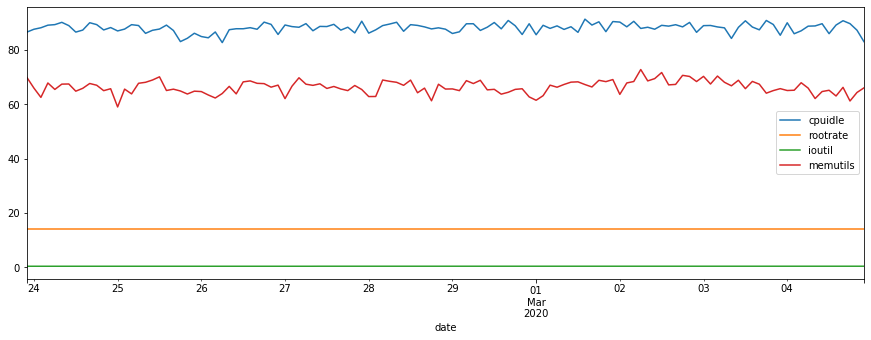

In [261]:
## 把四个用百分比表示的列画在一起，限定ip
df3.loc[(df3['ip']=='192.168.10.171' ),['cpuidle','rootrate','ioutil','memutils']].resample('120min').mean().plot()

In [262]:
## 避免resample重采样时把ip列过滤掉，用how＝first，原因是ip不是数字类型，groupby相当于把ip当成索引的一部分，多索引
df2=df[['cpuidle','ip']].groupby('ip').resample('D',how='first').mean()
df2

cpuidle
ip             date                 
192.168.10.171 2020-02-23  86.430000
               2020-02-24  88.134375
               2020-02-25  86.909825
               2020-02-26  86.561458
               2020-02-27  88.261458
...                              ...
192.168.10.97  2020-02-29  64.493403
               2020-03-01  64.821875
               2020-03-02  61.367361
               2020-03-03  59.897569
               2020-03-04  61.434074

[121 rows x 1 columns]

ip
192.168.10.171    AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.23     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.28     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.30     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.40     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.92     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.93     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.94     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.95     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.96     AxesSubplot(0.125,0.125;0.775x0.755)
192.168.10.97     AxesSubplot(0.125,0.125;0.775x0.755)
Name: cpuidle, dtype: object

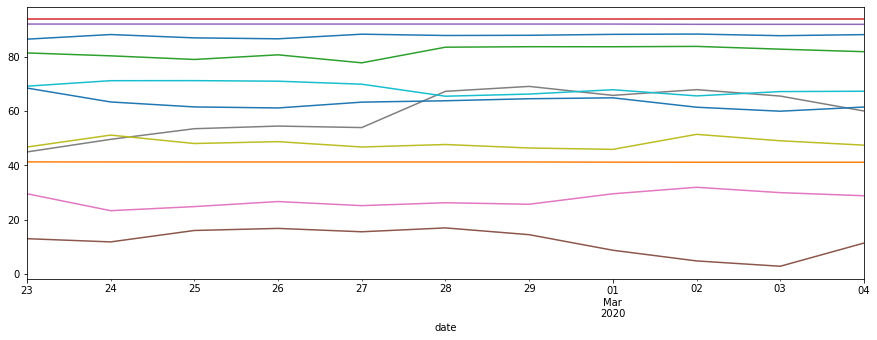

In [263]:
#按天重画所有ip的cpuidle曲线
df2.reset_index().set_index('date').groupby('ip')['cpuidle'].plot()

In [264]:
## bokeh 画图
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource
from bokeh.models.tools import HoverTool
from bokeh.palettes import Spectral10
from bokeh.io import output_notebook, push_notebook
output_notebook()
output_file('example.html')


Loading BokehJS ...

### 官网参考：https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html

In [265]:
df[:5]

,ip,cpuidle,memtotal,memused,rx,tx,rootrate,ioawait,ioutil
date,,,,,,,,,
2020-02-23 22:20:02,192.168.10.171,88.2,2047936,594160,19232,61151,14,0.31,0.35
2020-02-23 22:25:02,192.168.10.171,88.2,2047936,602008,7023,13761,14,0.31,0.35
2020-02-23 22:30:02,192.168.10.171,87.5,2047936,603252,11638,17528,14,0.31,0.35
2020-02-23 22:35:02,192.168.10.171,93.8,2047936,595900,12014,18819,14,0.31,0.35
2020-02-23 22:40:02,192.168.10.171,88.2,2047936,597732,11964,21469,14,0.31,0.35


In [266]:
#单个ip的cpuidle：
grouped=df.loc[(df['ip']=='192.168.10.171' ),['cpuidle']].resample('D').mean().reset_index()
source = ColumnDataSource(grouped)
grouped[:4]

,date,cpuidle
0,2020-02-23,86.430000
1,2020-02-24,88.134375
2,2020-02-25,86.909825
3,2020-02-26,86.561458


In [267]:
p = figure(x_axis_type='datetime')

p.line(x='date', y='cpuidle', line_width=2, source=source, legend_label='171')

p.yaxis.axis_label = 'cpuidle'
show(p)

In [268]:
#所有ip的cpuidle：
ips=df['ip'].unique()
p = figure(x_axis_type='datetime')
i=0
for ip in ips:
    i=i+1
    grouped=df.loc[(df['ip']==ip ),['cpuidle']].resample('D').mean().reset_index()
    source = ColumnDataSource(grouped)
    p.line(x='date', y='cpuidle', line_width=2, source=source, color=Spectral10[i%9], legend_label=ip)

p.yaxis.axis_label = 'cpuidle'
show(p)

In [269]:
# interactive 交互选择ip或项目，得到相应曲线
from ipywidgets import interact
import numpy as np
from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.palettes import brewer
output_notebook()


Loading BokehJS ...

In [270]:
def update(ip,item):
    p = figure(x_axis_type='datetime')
    p.yaxis.axis_label = item
    grouped=df.loc[(df['ip']==ip ),[item]].resample('D').mean().reset_index()
    source = ColumnDataSource(grouped)
    p.line(x='date', y=item, line_width=2, source=source, legend_label=ip+item)
    show(p, notebook_handle=True)
    push_notebook()

In [271]:
interact(update, ip=df['ip'].unique(),  item=df.columns[1:])

interactive(children=(Dropdown(description='ip', options=('192.168.10.171', '192.168.10.23', '192.168.10.28', …

<function __main__.update(ip, item)>

In [301]:
# 加个顔色,和采样周期
from bokeh.palettes import Spectral11

def update(ip,item,per):
    p = figure(x_axis_type='datetime')
    p.yaxis.axis_label = item
    grouped=df3.loc[(df3['ip']==ip ),[item]].resample(per).mean().reset_index()
    source = ColumnDataSource(grouped)
    p.line(x='date', y=item, line_width=2, source=source, color=Spectral11[ips.tolist().index(ip)],legend_label=ip+item)
    show(p, notebook_handle=True)
    push_notebook()

ips=df3['ip'].unique()
period=['5min','15min','60min','120min','D','2D','3D']
interact(update, ip=ips,  item=df3.columns[1:],per=period)


interactive(children=(Dropdown(description='ip', options=('192.168.10.23', '192.168.10.92', '192.168.10.30', '…

<function __main__.update(ip, item, per)>

In [304]:
df3[:5]

,ip,cpuidle,memtotal,memused,rx,tx,rootrate,ioawait,ioutil,memutils
date,,,,,,,,,,
2020-02-23 22:10:02,192.168.10.23,41.3,115572872,90595360,1005,253,67,1.66,0.07,78.39
2020-02-23 22:10:03,192.168.10.92,46.0,8168864,3846048,95167,129432,71,3.51,56.01,47.08
2020-02-23 22:15:02,192.168.10.30,93.8,65955588,65264088,12110,117974,67,3.05,0.22,98.95
2020-02-23 22:15:03,192.168.10.23,41.3,115572872,90590608,922,324,67,1.66,0.07,78.38
2020-02-23 22:15:03,192.168.10.92,2.1,8168864,3847224,51386,83148,71,3.51,56.01,78.38


In [303]:
#多图，选择一个ip，显示这个ip的所有数据
#选择采样间隔，数据图跟随变化
from bokeh.palettes import Spectral11

def update(ip,per):
    p = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p.yaxis.axis_label = 'cpuidle'
    grouped=df3.loc[(df3['ip']==ip ),['cpuidle']].resample(per).mean().reset_index()
    source = ColumnDataSource(grouped)
    p.line(x='date', y='cpuidle', line_width=1, source=source, color=Spectral11[ips.tolist().index(ip)],legend_label='cpuidle')

    p2 = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p2.yaxis.axis_label = 'memutils'
    grouped2=df3.loc[(df3['ip']==ip ),['memutils']].resample(per).mean().reset_index()
    source2= ColumnDataSource(grouped2)
    p2.line(x='date', y='memutils', line_width=1, source=source2, color=Spectral11[ips.tolist().index(ip)],legend_label='memutils')

    p3 = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p3.yaxis.axis_label = 'rootrate'
    grouped3=df3.loc[(df3['ip']==ip ),['rootrate']].resample(per).mean().reset_index()
    source3= ColumnDataSource(grouped3)
    p3.line(x='date', y='rootrate', line_width=1, source=source3, color=Spectral11[ips.tolist().index(ip)],legend_label='rootrate')
    
    p4 = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p4.yaxis.axis_label = 'iotuil'
    grouped4=df3.loc[(df3['ip']==ip ),['ioutil']].resample(per).mean().reset_index()
    source4= ColumnDataSource(grouped4)
    p4.line(x='date', y='ioutil', line_width=1, source=source4, color=Spectral11[ips.tolist().index(ip)],legend_label='ioutil')
    
    p_rx = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p_rx.yaxis.axis_label = 'rx'
    grouped_rx=df3.loc[(df3['ip']==ip ),['rx']].resample(per).mean().reset_index()
    source_rx= ColumnDataSource(grouped_rx)
    p_rx.line(x='date', y='rx', line_width=1, source=source_rx, color=Spectral11[ips.tolist().index(ip)],legend_label='rx')
    
    p_tx = figure(x_axis_type='datetime',plot_width=250, plot_height=250)
    p_tx.yaxis.axis_label = 'tx'
    grouped_tx=df3.loc[(df3['ip']==ip ),['tx']].resample(per).mean().reset_index()
    source_tx= ColumnDataSource(grouped_tx)
    p_tx.line(x='date', y='tx', line_width=1, source=source_tx, color=Spectral11[ips.tolist().index(ip)],legend_label='tx')
    
    show(row(p,p2,p_rx), notebook_handle=True)
    show(row(p3,p4,p_tx), notebook_handle=True)
    push_notebook()

ips=df3['ip'].unique()
period=['5min','15min','60min','120min','D','2D','3D']
interact(update, ip=ips,  per=period)


interactive(children=(Dropdown(description='ip', options=('192.168.10.23', '192.168.10.92', '192.168.10.30', '…

<function __main__.update(ip, per)>